<a href="https://colab.research.google.com/github/msopiann/kitaaaaa/blob/main/skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Nov 20 03:56:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 22.5 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import Image

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1Ahmwe4b7AbdmyN7Ls7h")
project = rf.workspace("class-t58ex").project("student-behavior")
version = project.version(15)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [10]:
dataset.location

'/content/student-behavior-15'

In [12]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model=yolo11m.pt epochs=50 imgsz=640

100% 38.8M/38.8M [00:00<00:00, 272MB/s]
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/student-behavior-15/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

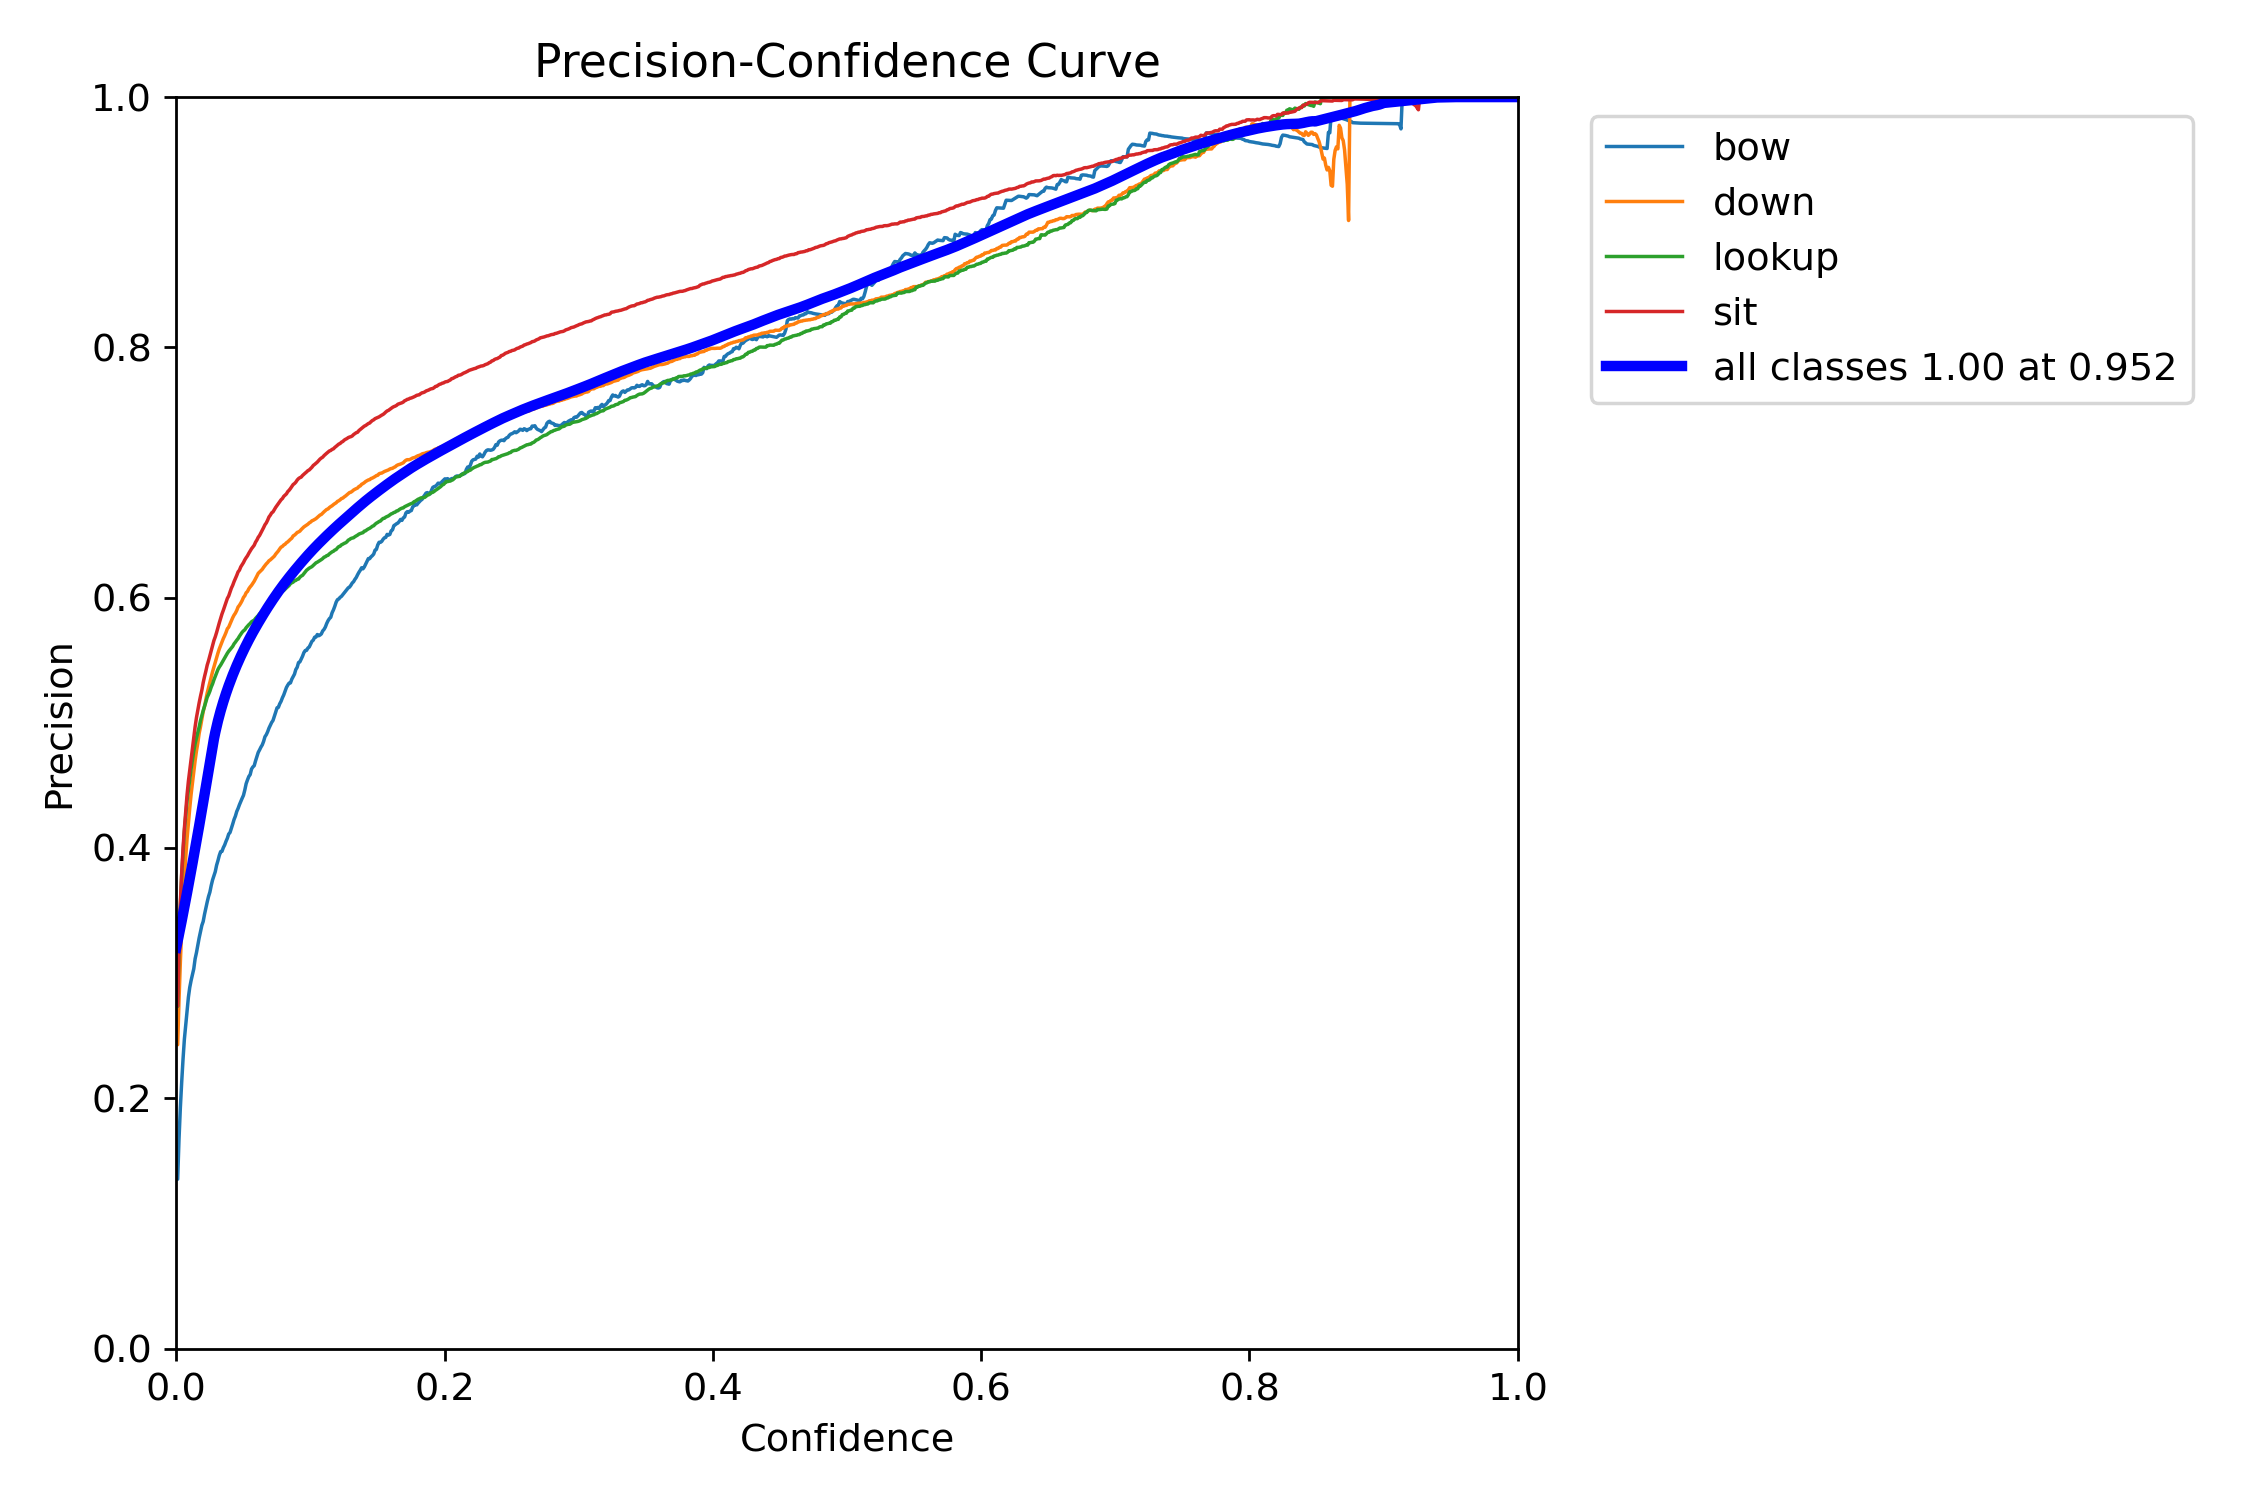

In [13]:
Image("/content/runs/detect/train/P_curve.png", width=600)

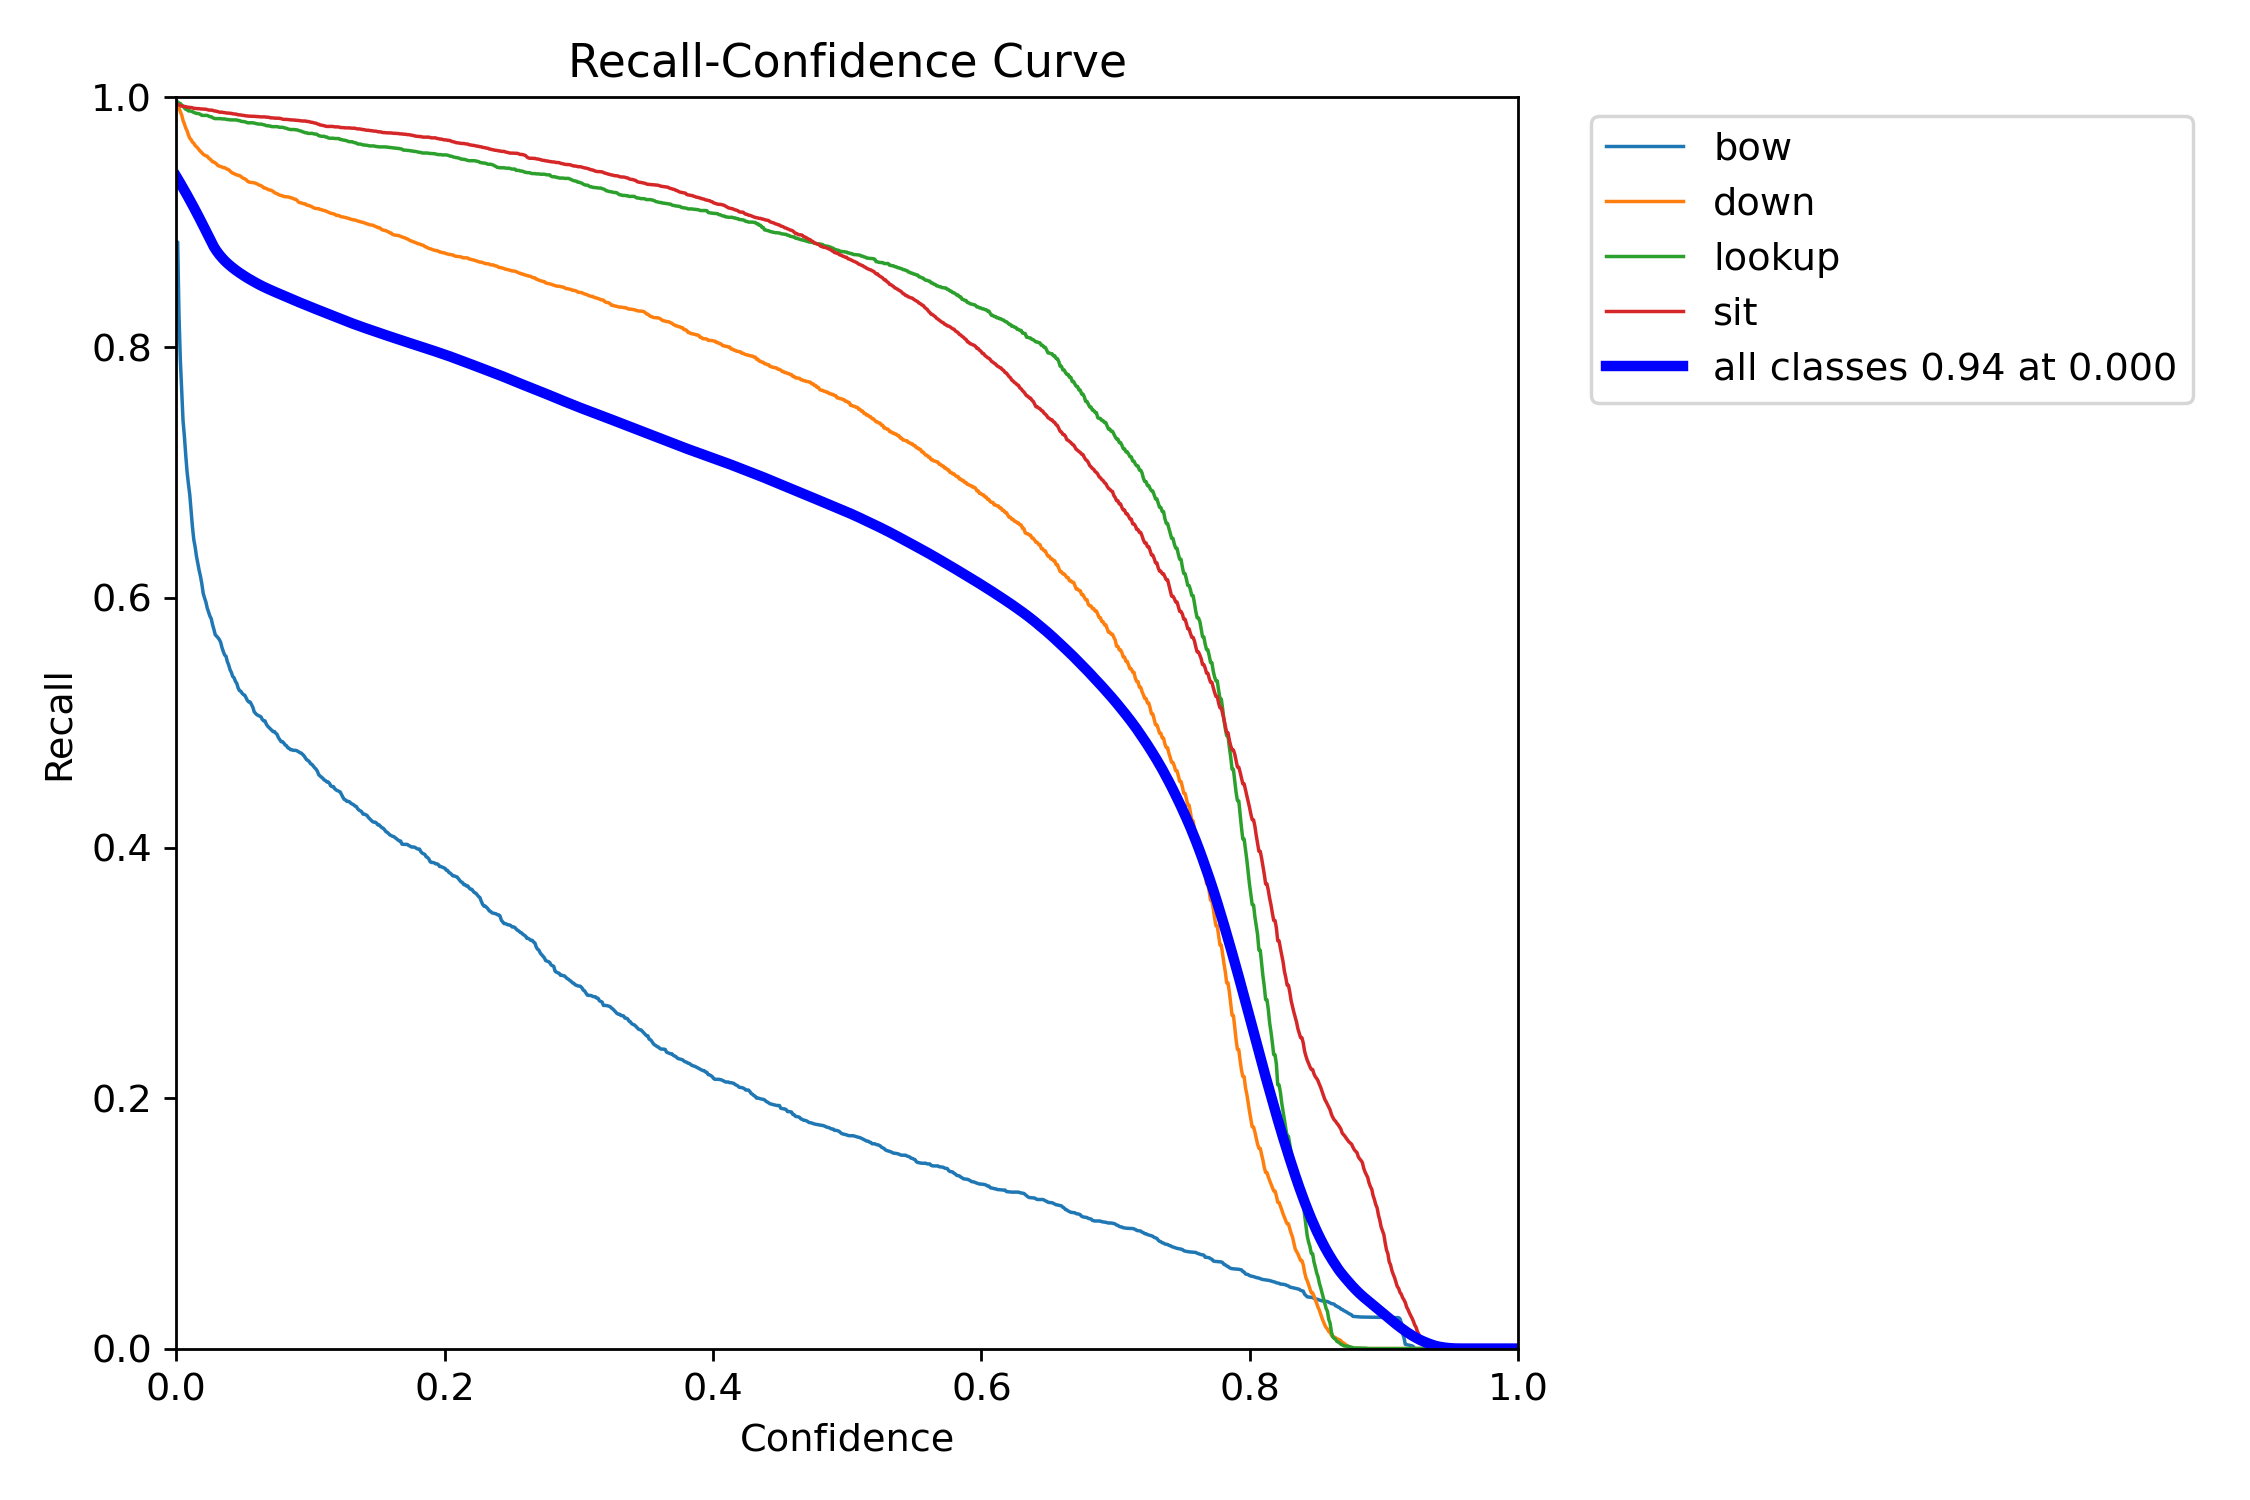

In [14]:
Image("/content/runs/detect/train/R_curve.png", width=600)

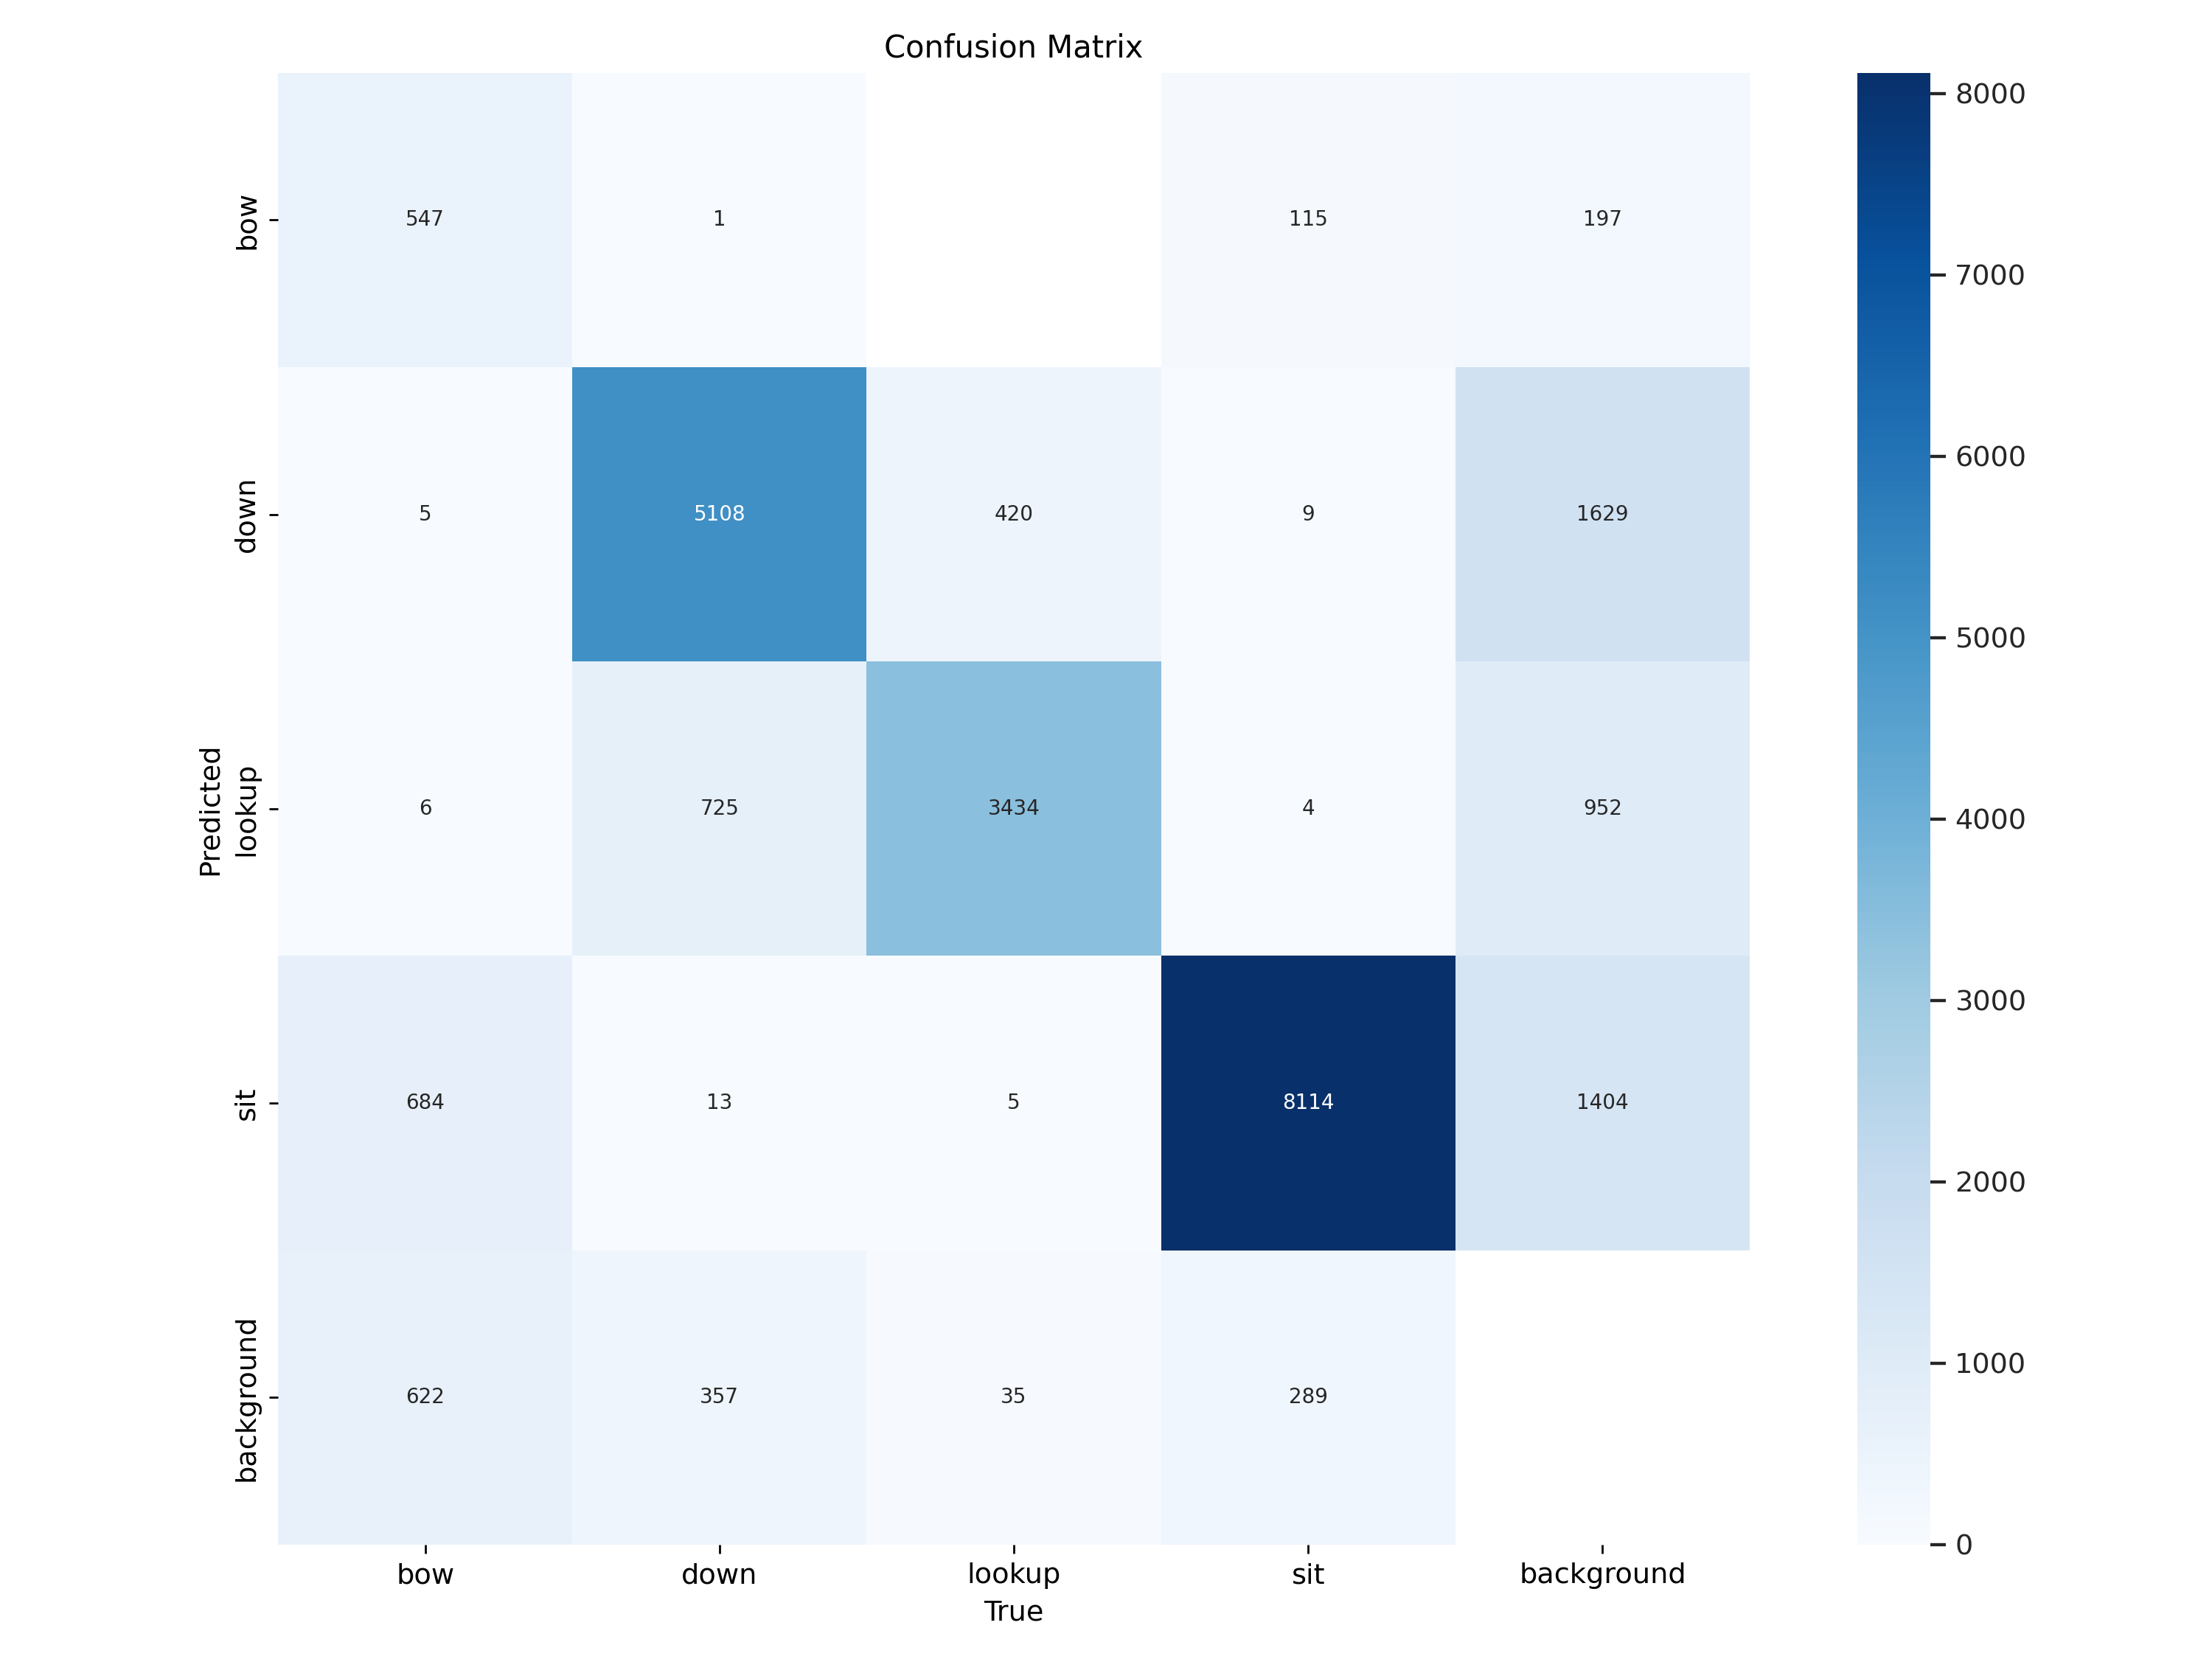

In [15]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

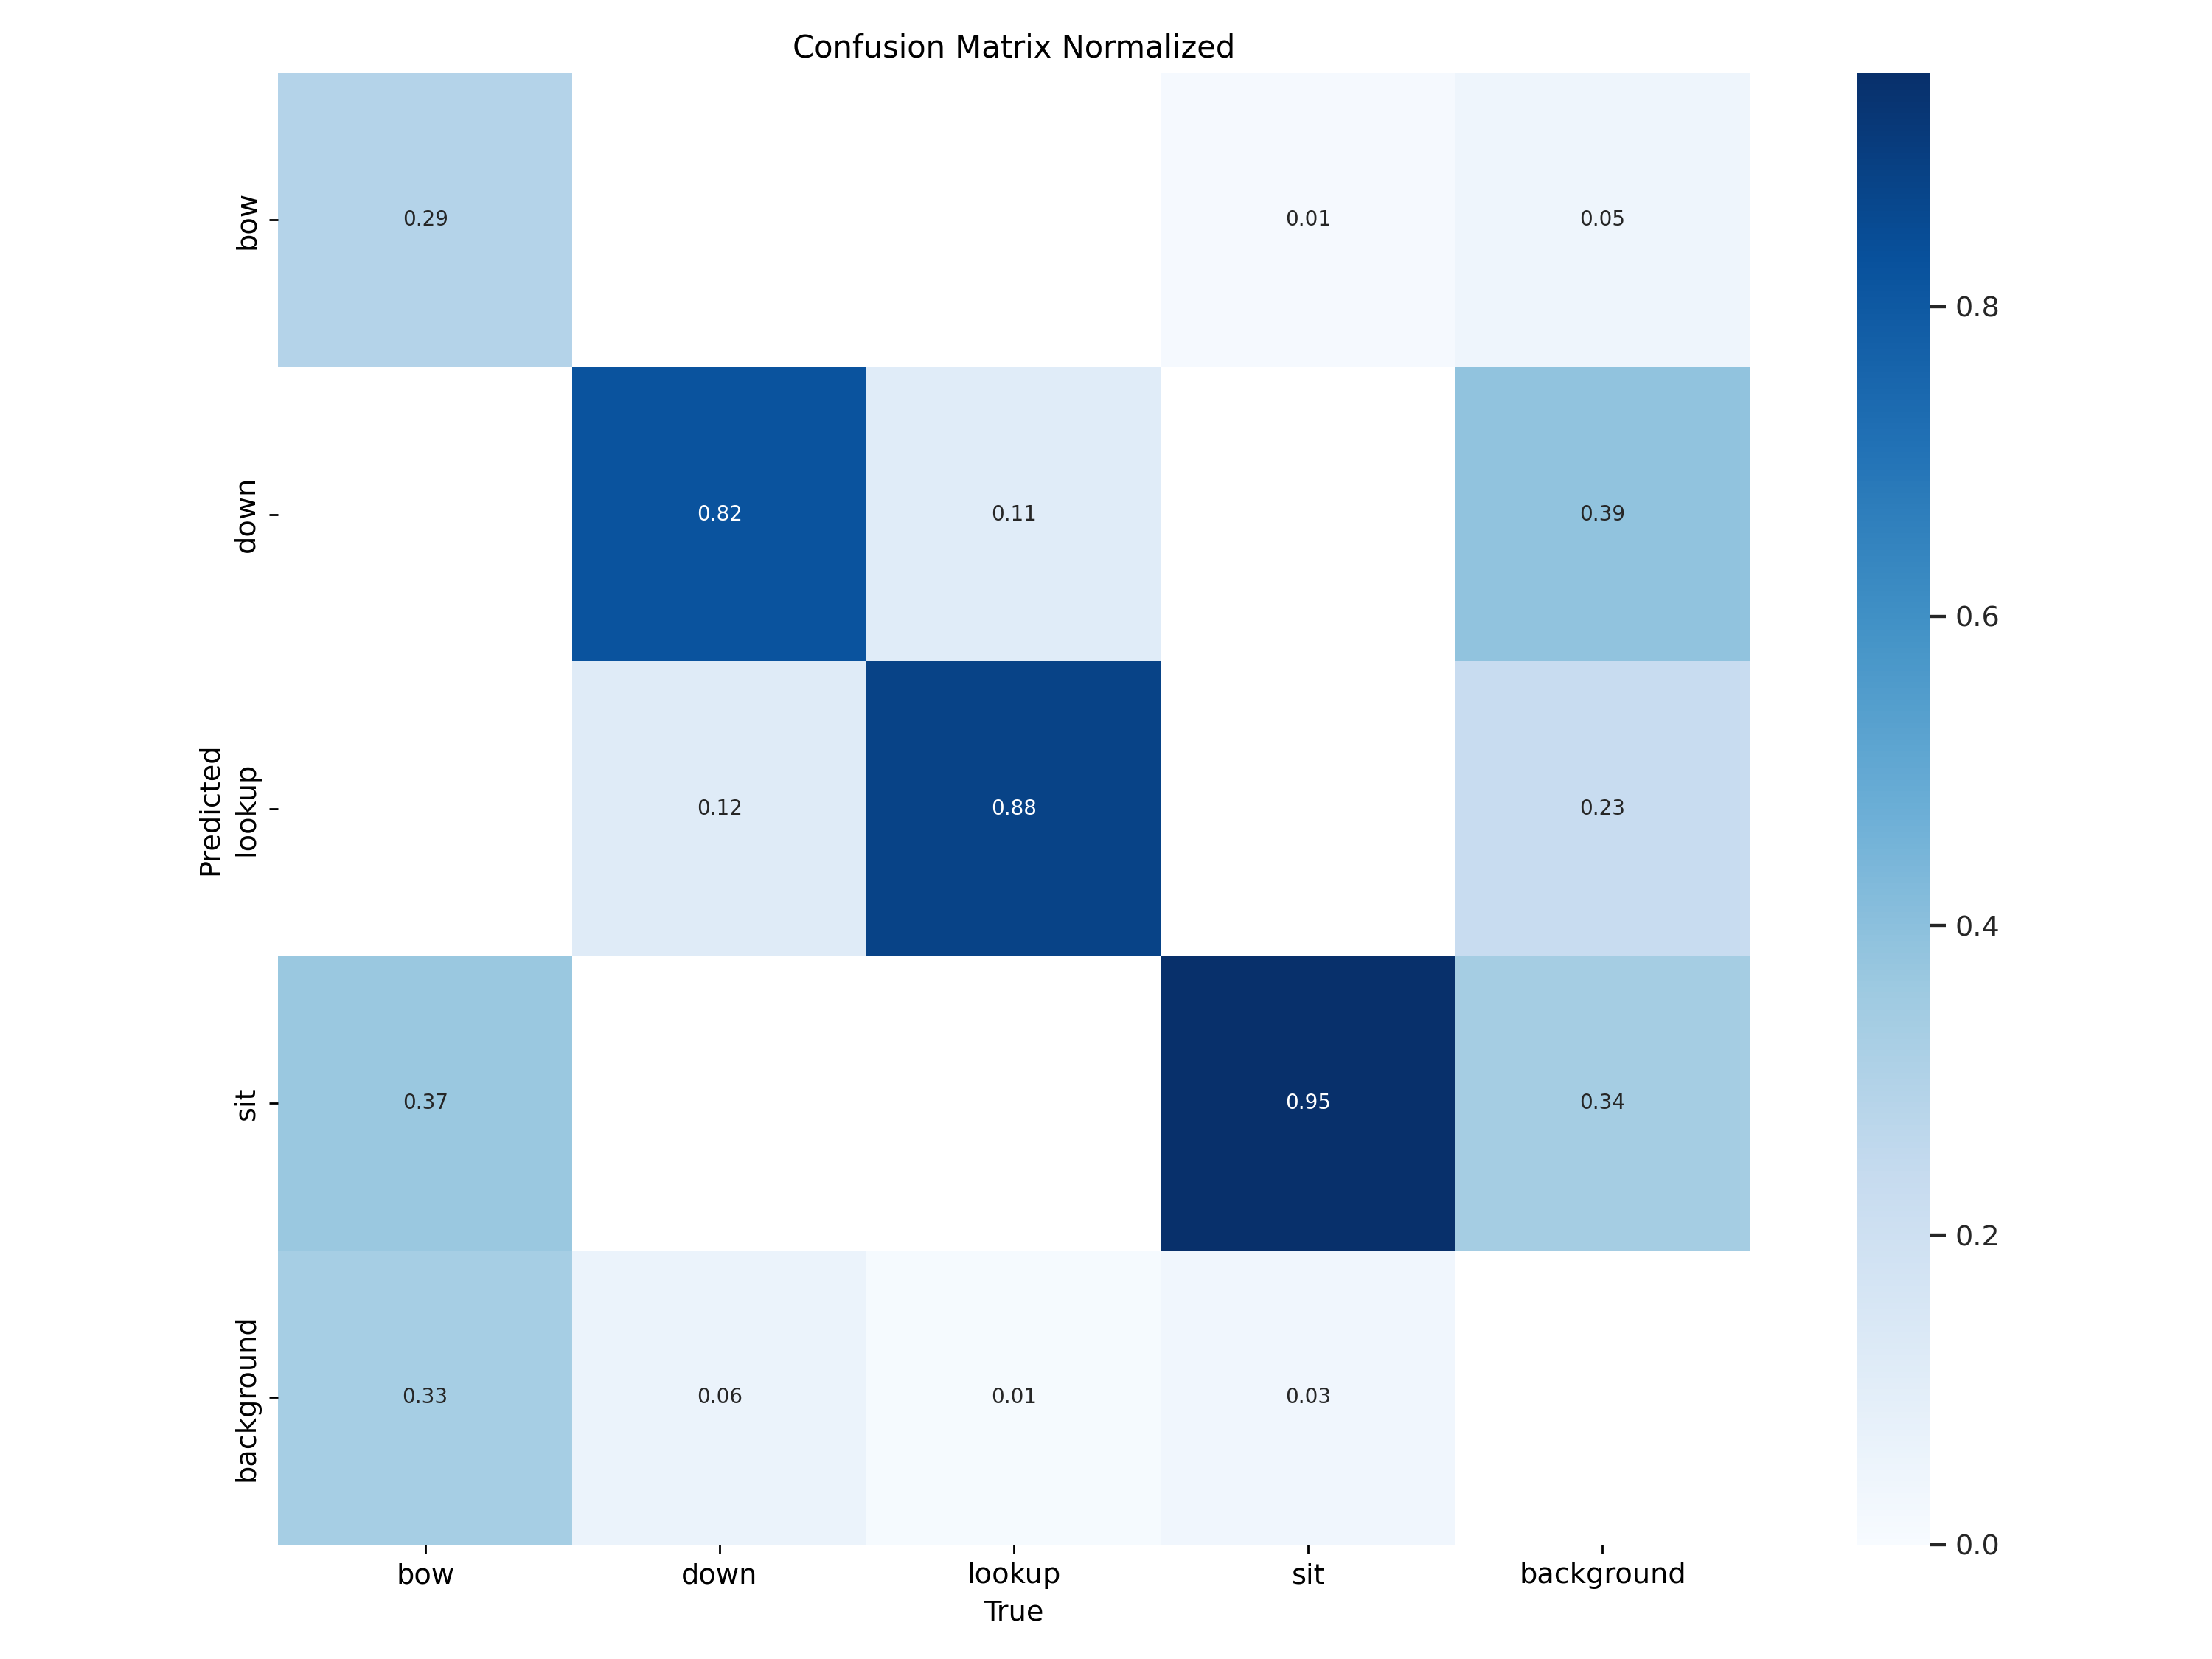

In [16]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

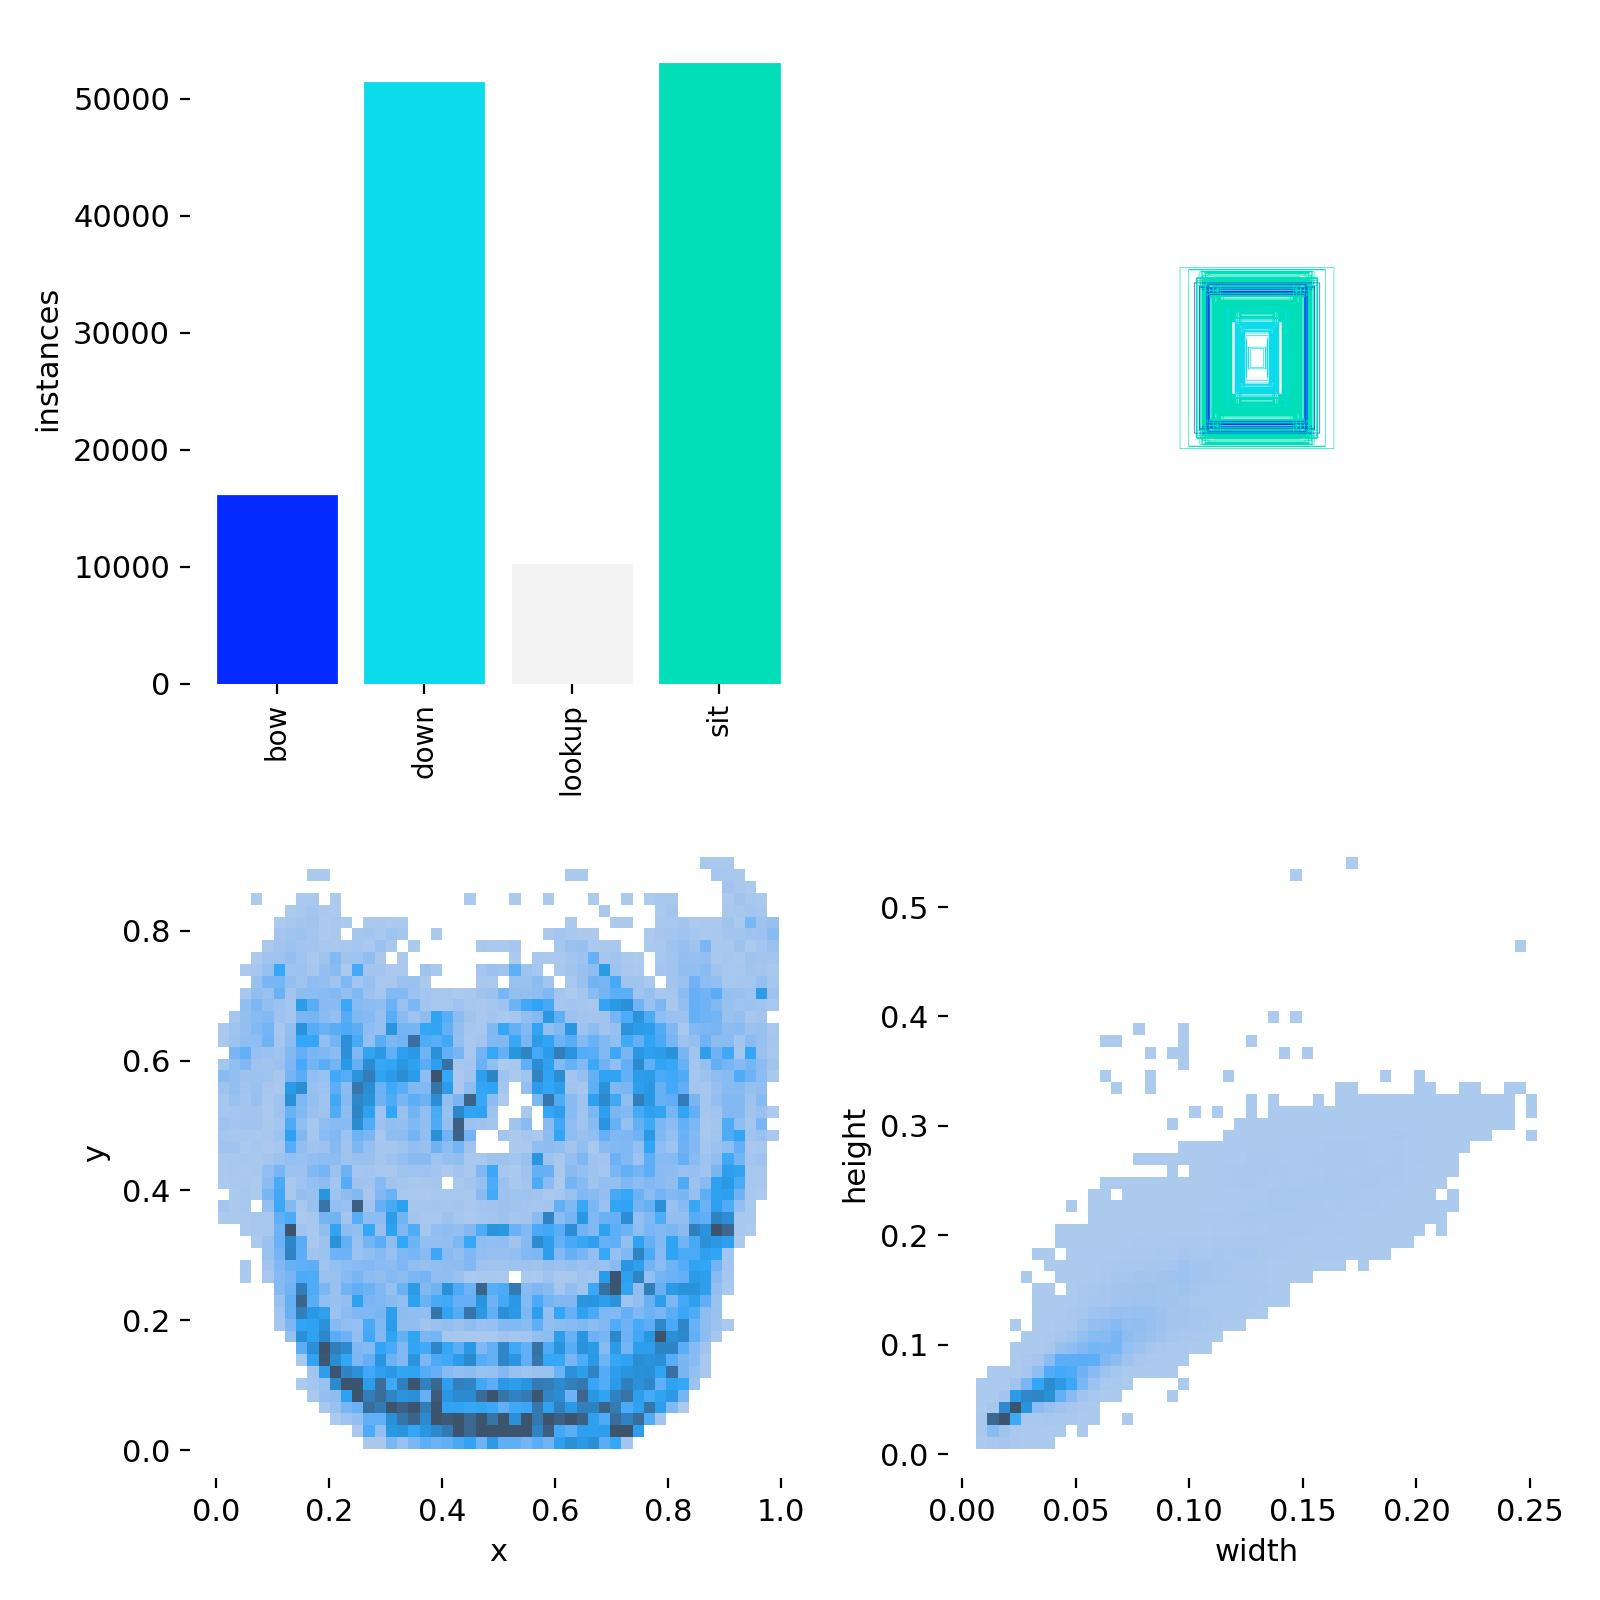

In [17]:
Image("/content/runs/detect/train/labels.jpg", width=600)

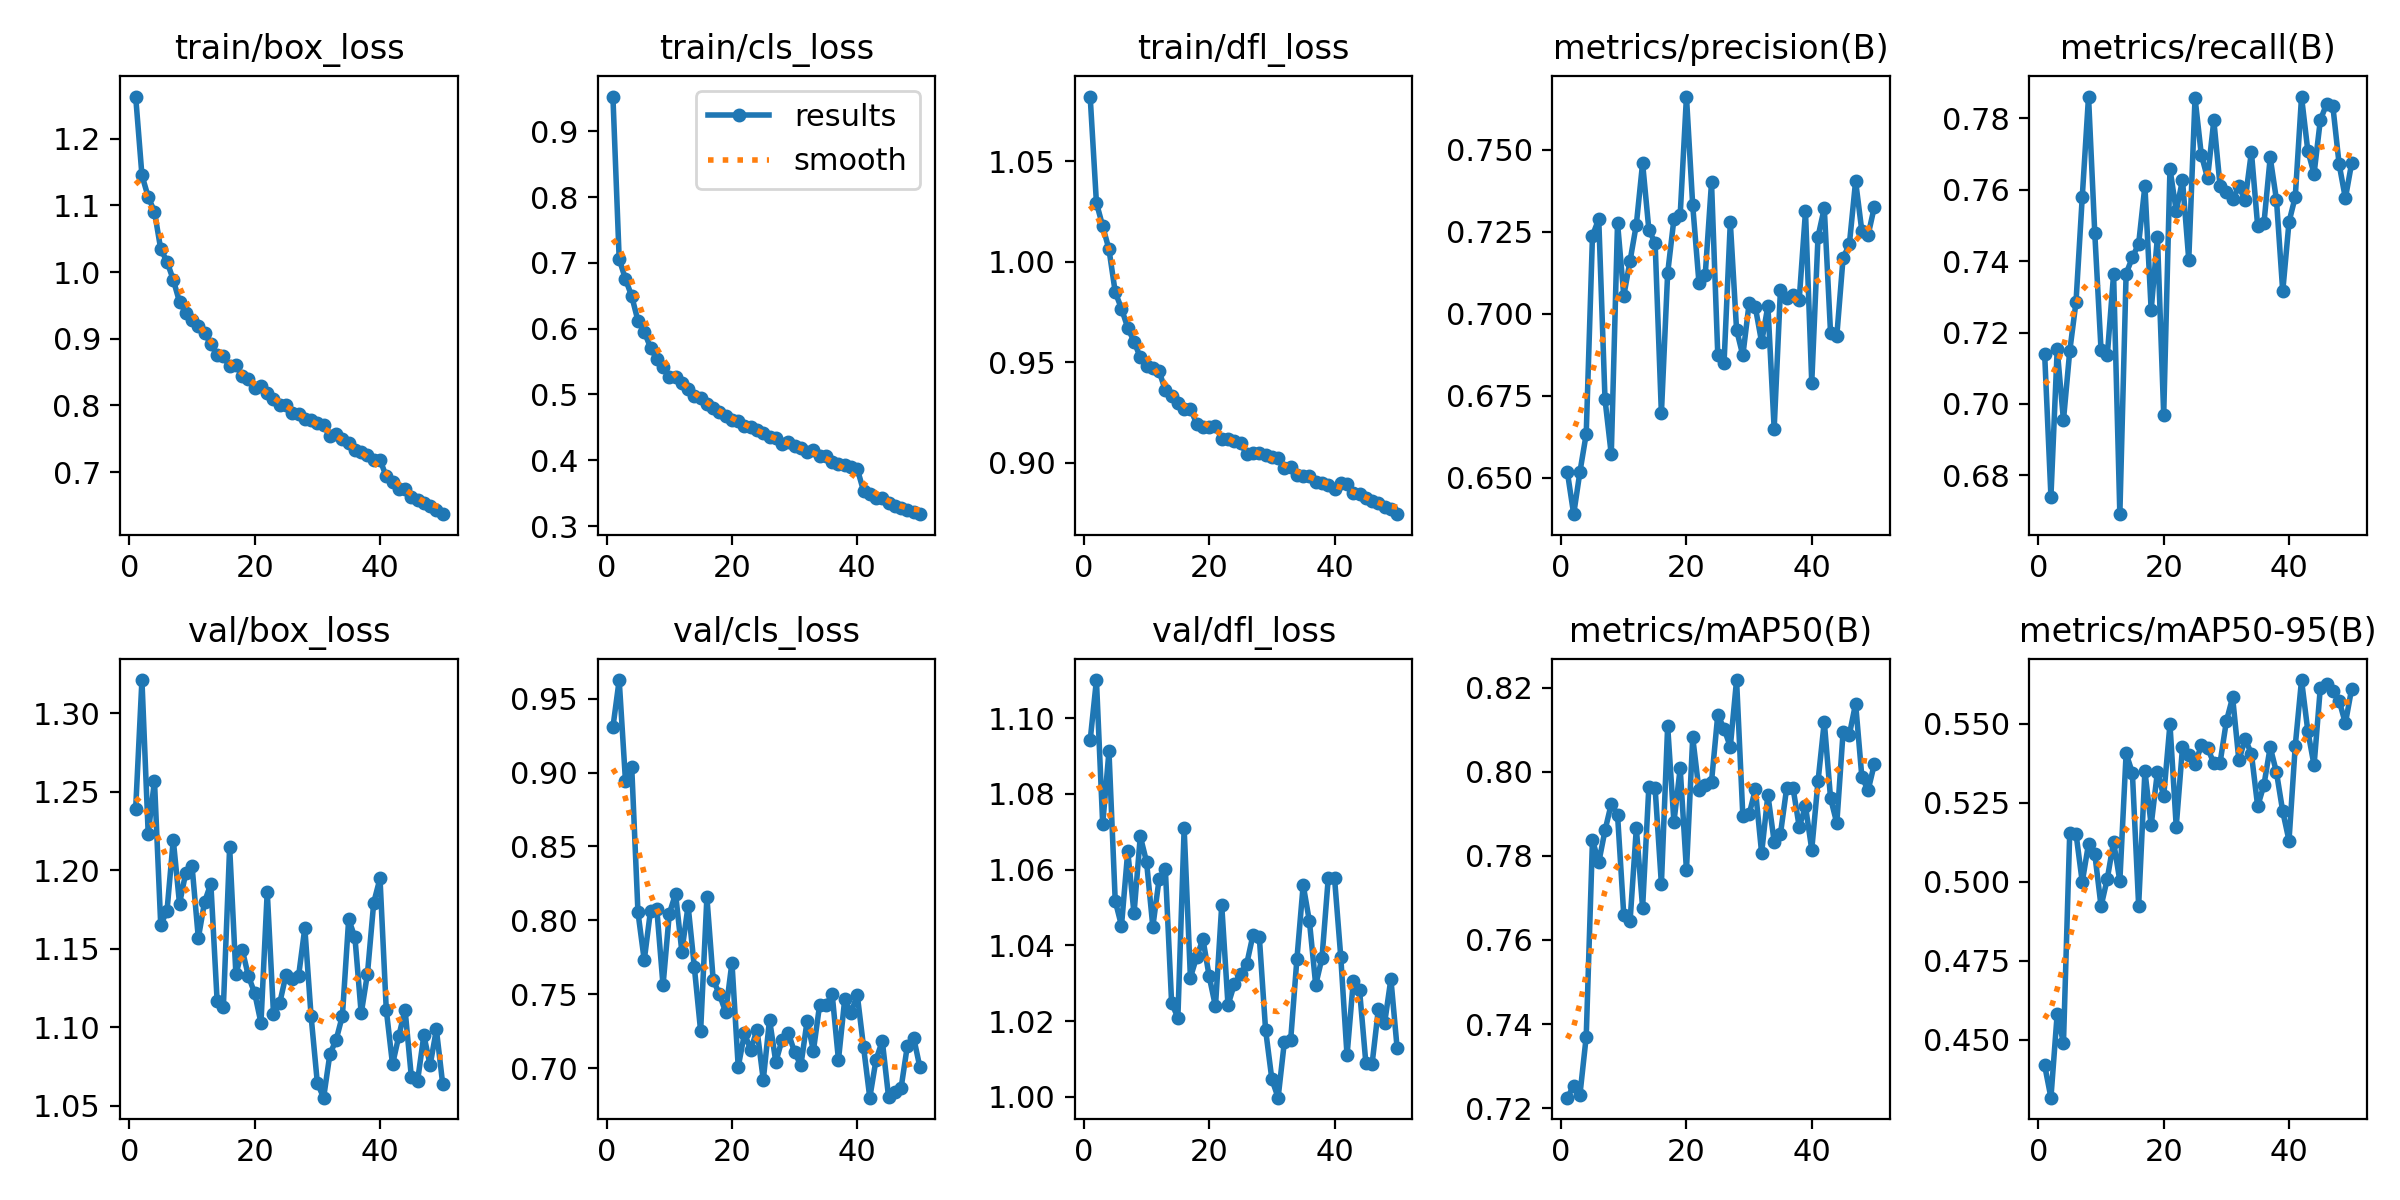

In [19]:
Image("/content/runs/detect/train/results.png", width=600)

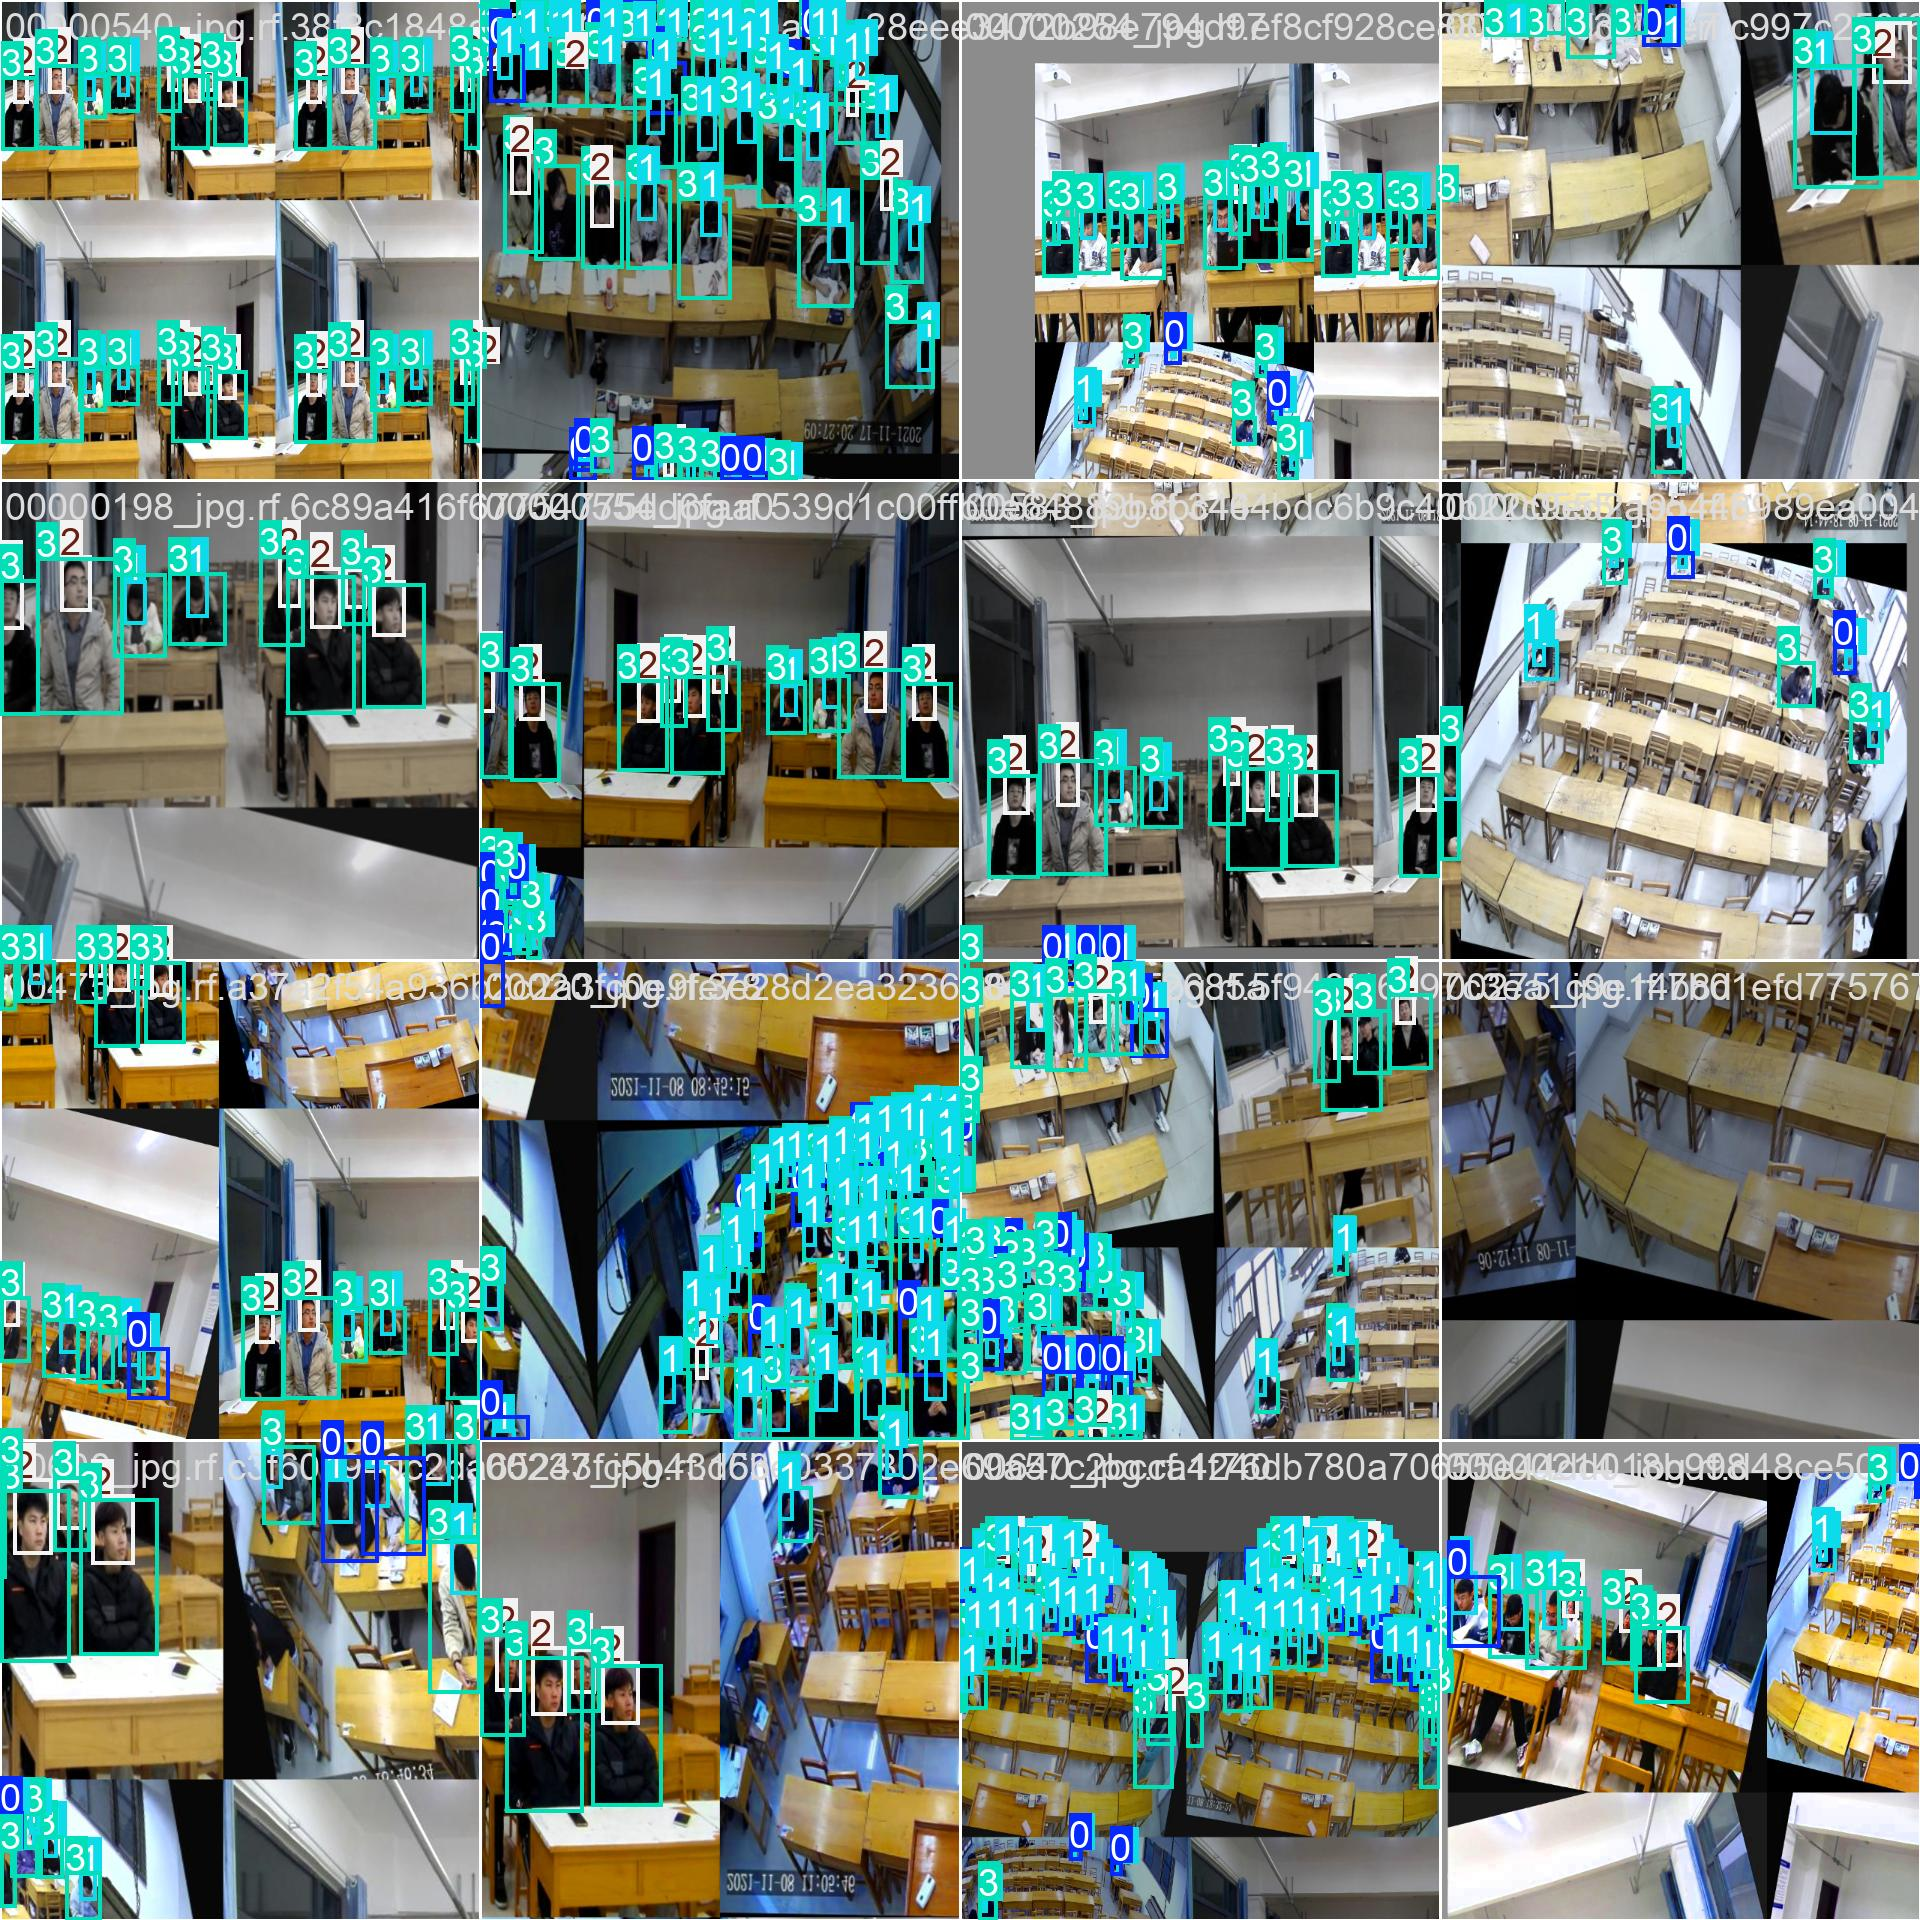

In [20]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

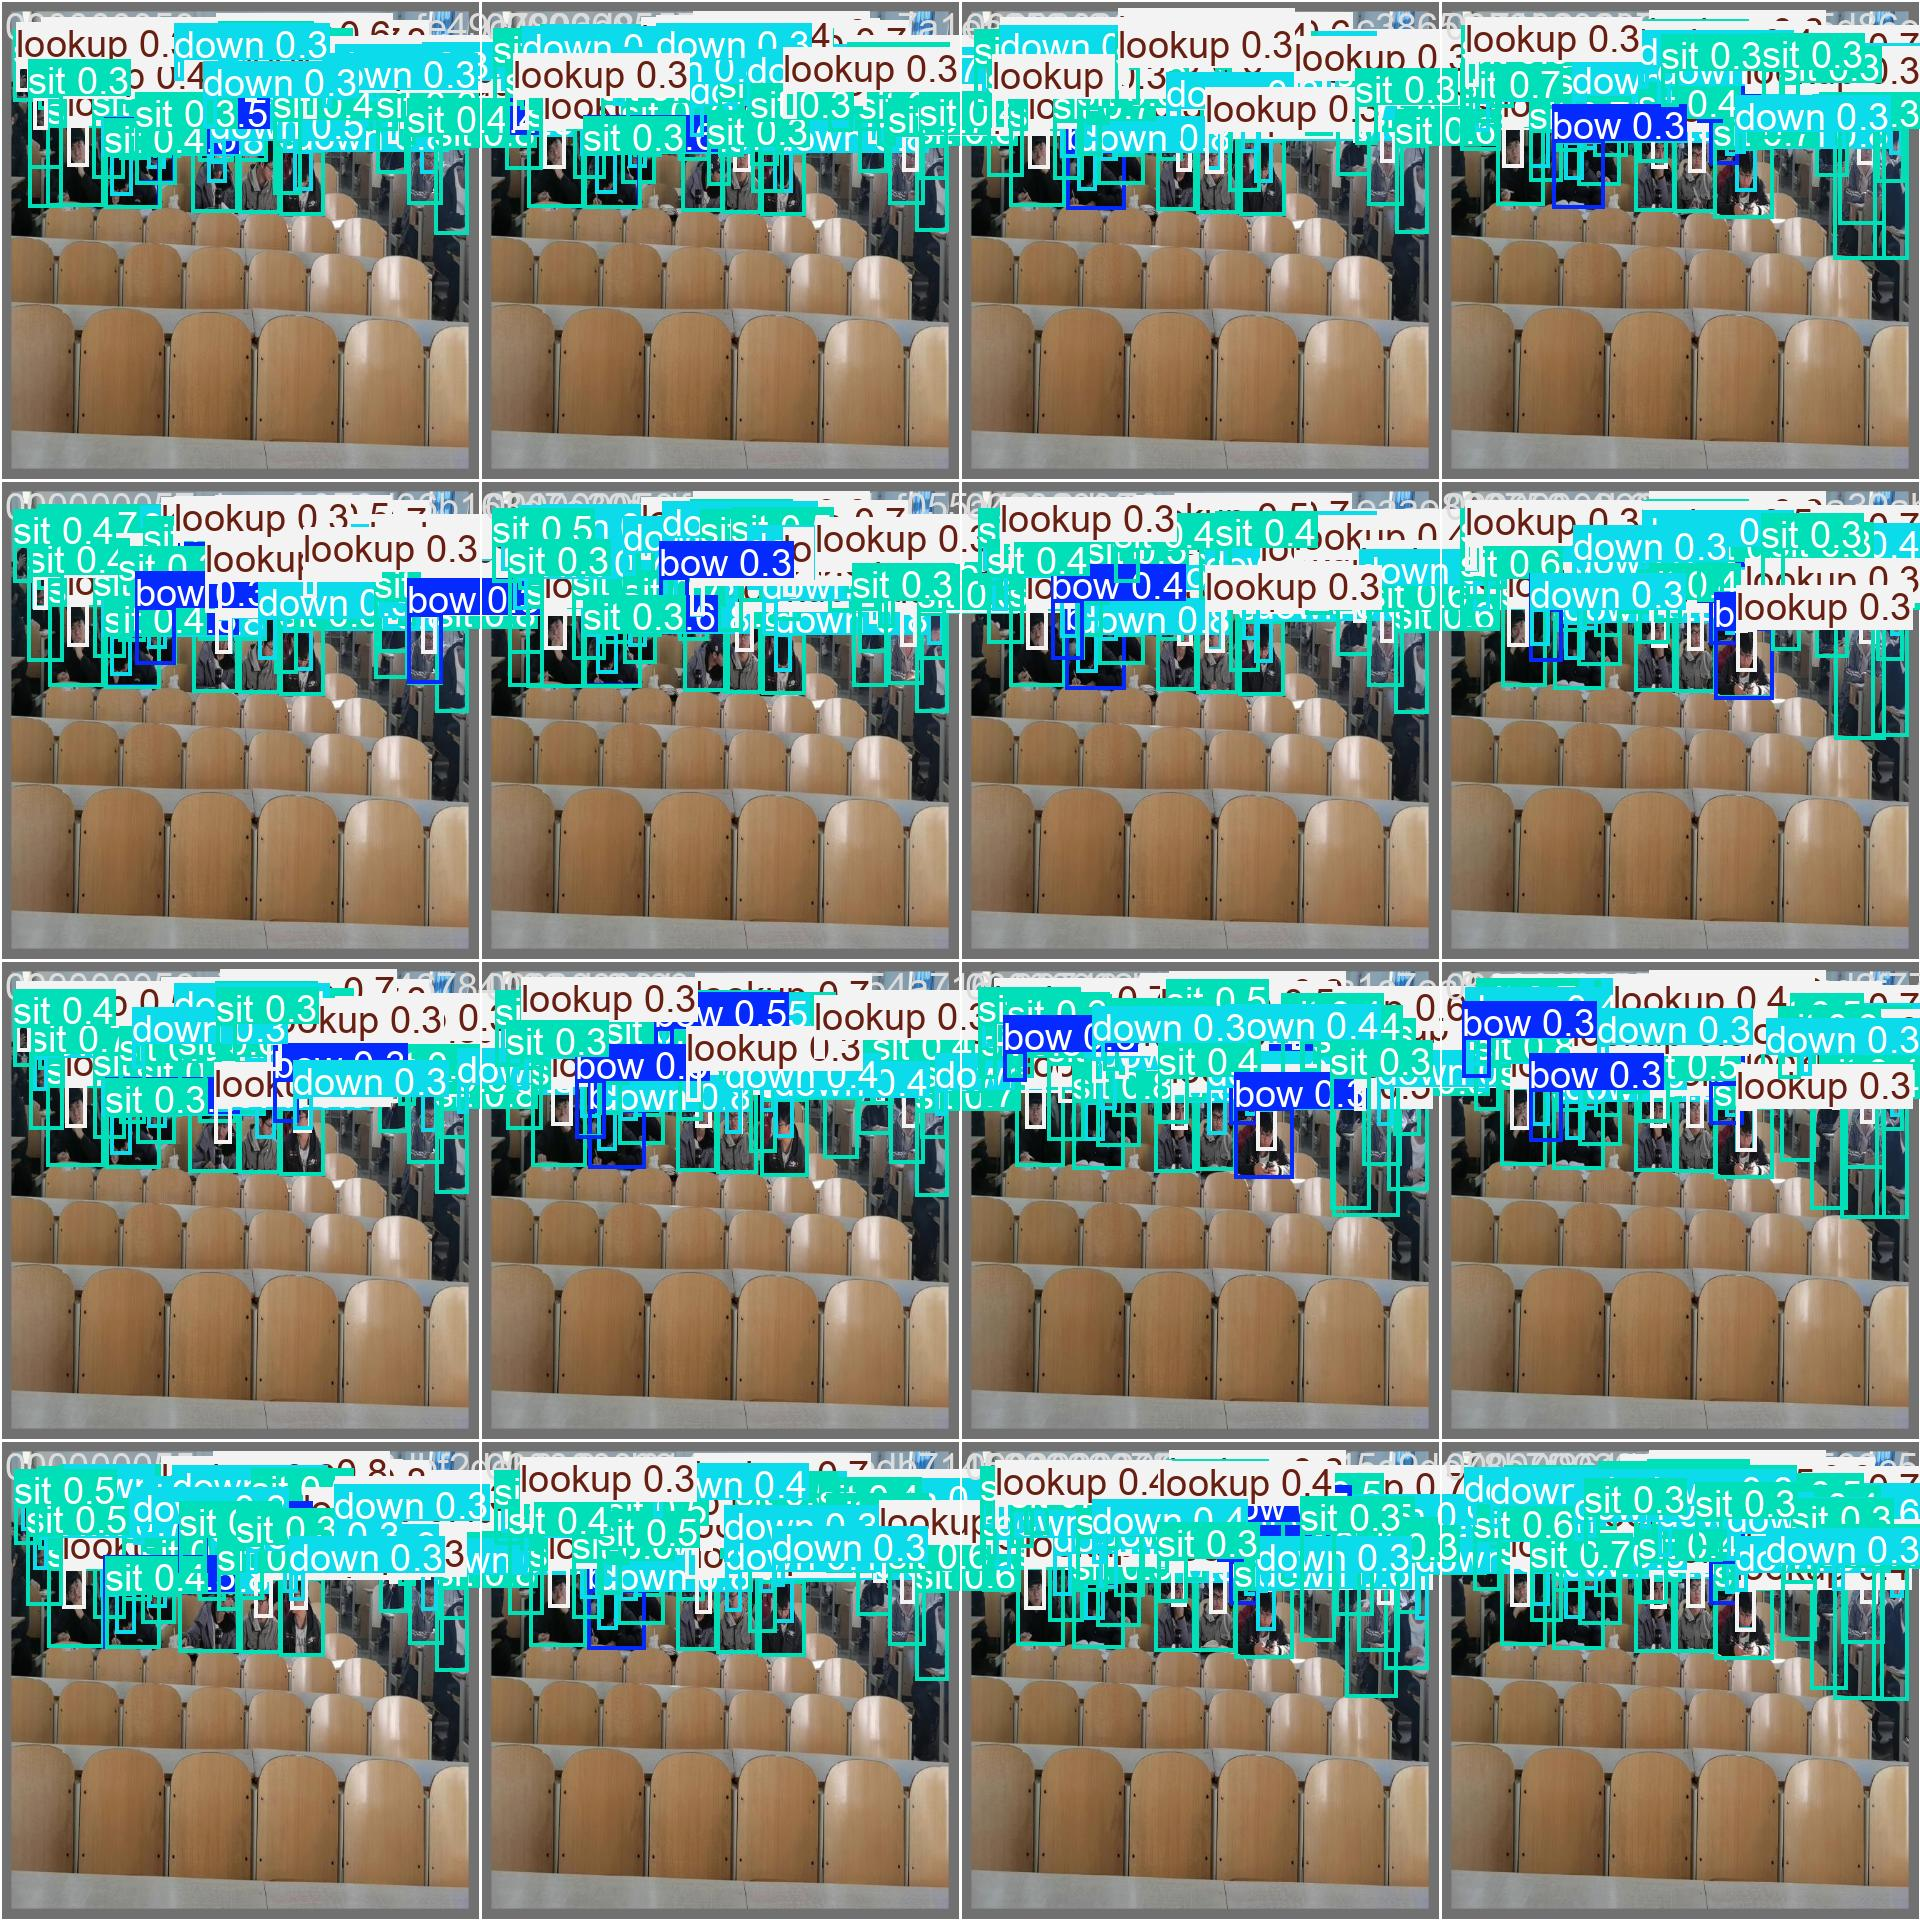

In [21]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
!mv /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/skripsi

In [26]:
!gdown "https://drive.google.com/uc?id=1-6kN4S3tQELOySZUNUjwG7nZAIYSkGbb&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1-6kN4S3tQELOySZUNUjwG7nZAIYSkGbb&confirm=t
To: /content/best.pt
100% 40.5M/40.5M [00:00<00:00, 152MB/s]


In [27]:
!yolo task=detect mode=val model="best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/student-behavior-15/valid/labels.cache... 331 images, 0 backgrounds, 0 corrupt: 100% 331/331 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:19<00:00,  1.10it/s]
                   all        331      20493      0.733      0.786      0.812      0.564
                   bow        324       1864       0.71      0.364      0.508       0.35
                  down        331       6204      0.732       0.87      0.874      0.589
                lookup        326       3894      0.705      0.949      0.922      0.625
                   sit        331       8531      0.783      0.961      0.945      0.693
Speed: 2.1ms preprocess, 23.9ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more 

In [32]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source="class.mp4" save=True

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs

video 1/1 (frame 1/1443) /content/class.mp4: 384x640 1 down, 1 lookup, 2 sits, 67.2ms
video 1/1 (frame 2/1443) /content/class.mp4: 384x640 1 lookup, 2 sits, 24.1ms
video 1/1 (frame 3/1443) /content/class.mp4: 384x640 1 bow, 1 lookup, 1 sit, 24.0ms
video 1/1 (frame 4/1443) /content/class.mp4: 384x640 1 bow, 2 lookups, 1 sit, 24.0ms
video 1/1 (frame 5/1443) /content/class.mp4: 384x640 2 lookups, 1 sit, 24.0ms
video 1/1 (frame 6/1443) /content/class.mp4: 384x640 2 lookups, 1 sit, 24.0ms
video 1/1 (frame 7/1443) /content/class.mp4: 384x640 2 lookups, 1 sit, 22.1ms
video 1/1 (frame 8/1443) /content/class.mp4: 384x640 1 lookup, 2 sits, 18.3ms
video 1/1 (frame 9/1443) /content/class.mp4: 384x640 2 bows, 1 lookup, 1 sit, 18.3ms
video 1/1 (frame 10/1443) /content/class.mp4: 384x640 1 down, 2 lookups, 1 sit, 18.3ms
video 1/1 (fram

In [33]:
!pip install ffmpeg-python
import ffmpeg
input_avi = "/content/runs/detect/predict4/class.avi"
output_mp4 = "/content/runs/detect/predict4/class.mp4"

ffmpeg.input(input_avi).output(output_mp4, vcodec='libx264', acodec='aac').run()

(None, None)

In [34]:
!mv /content/runs/detect/predict4/class.mp4 /content/drive/MyDrive/skripsi